In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("all_data.csv")
print(df.info())
"""
Country-object-categorical nominal variable
Year-quantitative discrete variable
Life expectancy at birth-quantitative continuous variable
GDP- quantitative continunous variable
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


'\nCountry-object-categorical nominal variable\nYear-quantitative discrete variable\nLife expectancy at birth-quantitative continuous variable\nGDP- quantitative continunous variable\n'

In [3]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


**Observations**
1. Minimum life expectancy is 44 years while maximum is 81 years.
2. Minium GDP is $(4.415 x 10^9 ) while maximum GDP is $(1.81 x 10^13). 
3. There are 6 countires in the dataset.


In [4]:
df["Country"].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [5]:
#cleaning column name
df=df.rename({"Life expectancy at birth (years)":"LEABY"},axis="columns")

C:\Users\parsh\AppData\Local\Temp\ipykernel_14548\600128088.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineplot_1.set_xticklabels(lineplot_1.get_xticklabels(),rotation=45,horizontalalignment="right")


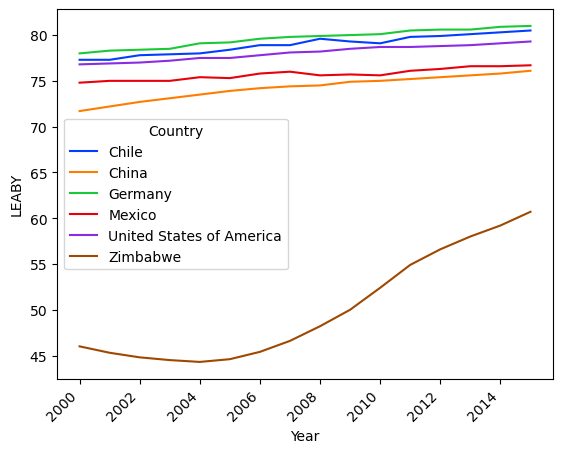

In [6]:
#Comparing life expectancy rise by country
lineplot_1=sns.lineplot(x="Year",y="LEABY",data=df,hue="Country", palette="bright")
lineplot_1.set_xticklabels(lineplot_1.get_xticklabels(),rotation=45,horizontalalignment="right")
plt.show()

**Boxplot 1 Observations**
We can clearly see that the 

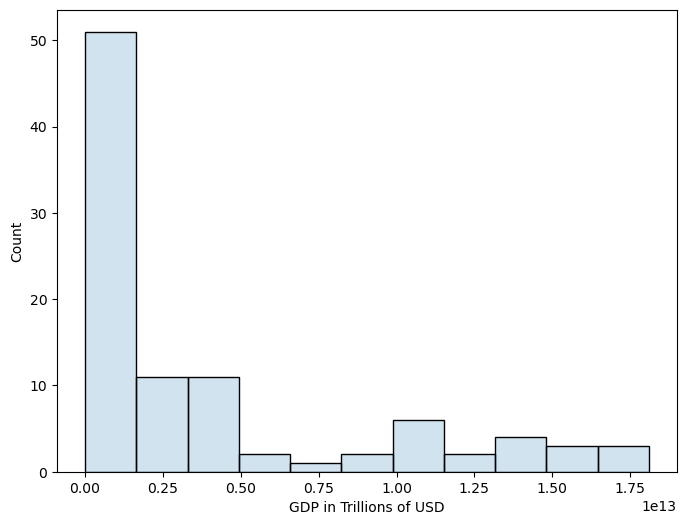

In [7]:
#charting a distribuiton of GDP
plt.figure(figsize=(8,6))
histplot_1=sns.histplot(data=df.GDP,alpha=0.2)
plt.xlabel("GDP in Trillions of USD")
plt.show()

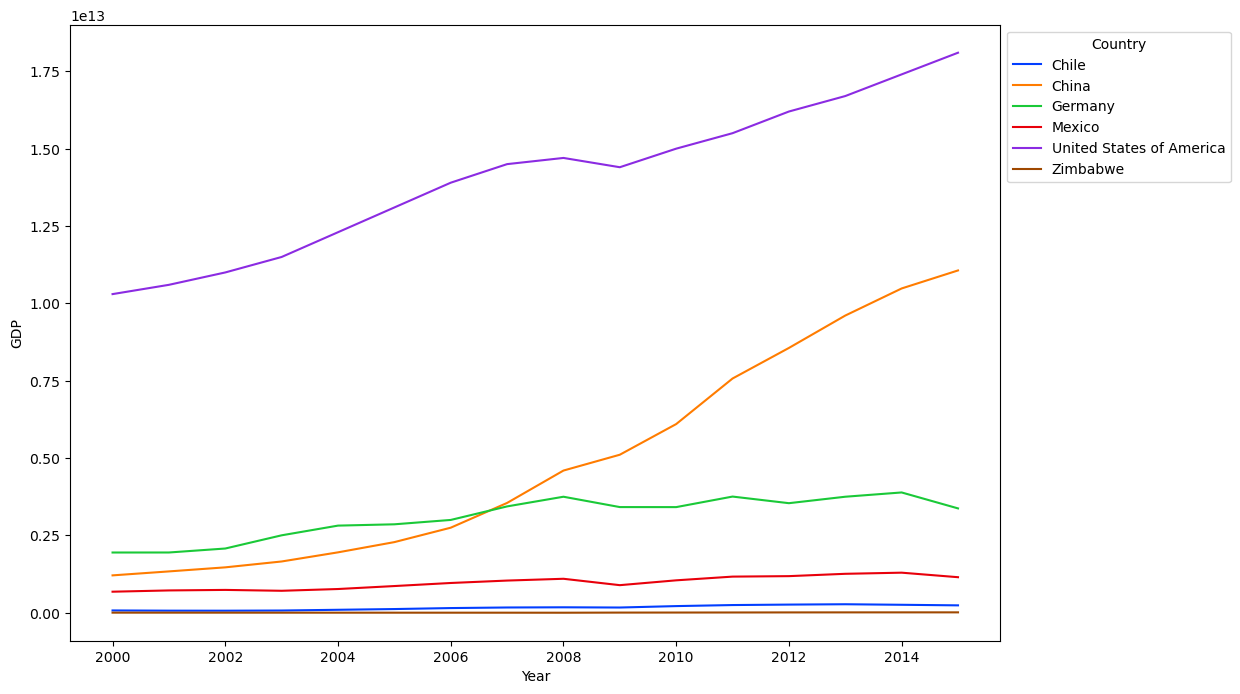

In [8]:
#Plotting GDP trend over time by country
plt.figure(figsize=(12,8))
lineplot_2=sns.lineplot(x="Year",y="GDP",data=df,hue="Country",palette="bright")
sns.move_legend(lineplot_2,"upper left",bbox_to_anchor=(1,1))
plt.savefig("gdp_with_time.png")
plt.show()


**Lineplot 2 observation**
GDP increase has been greatest for China (judging by the slope of the line) while almost stagnant for Mexico, Chile, Zimbabwe

In [9]:
#grouping average GDP and Life expectancy by country
df_means=df.drop("Year",axis=1).groupby("Country").mean().reset_index()

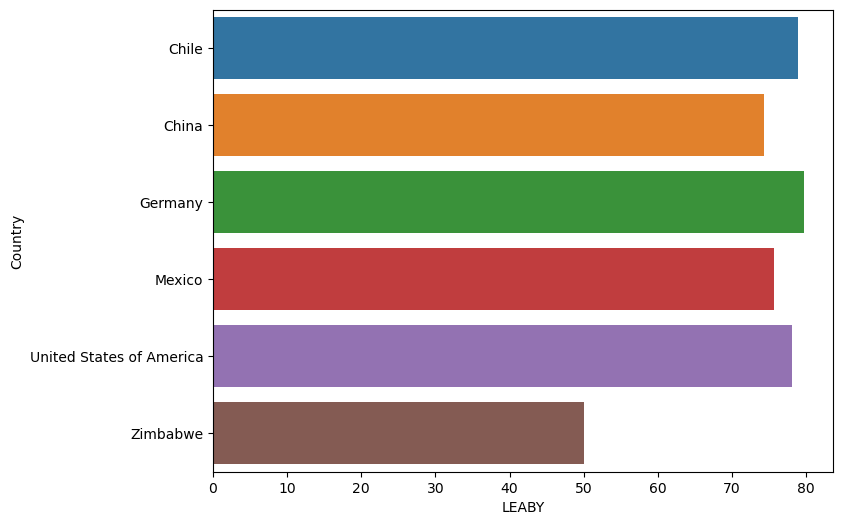

In [10]:
#Barplot of mean life expectancy by country
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY",y="Country",data=df_means)
plt.show()

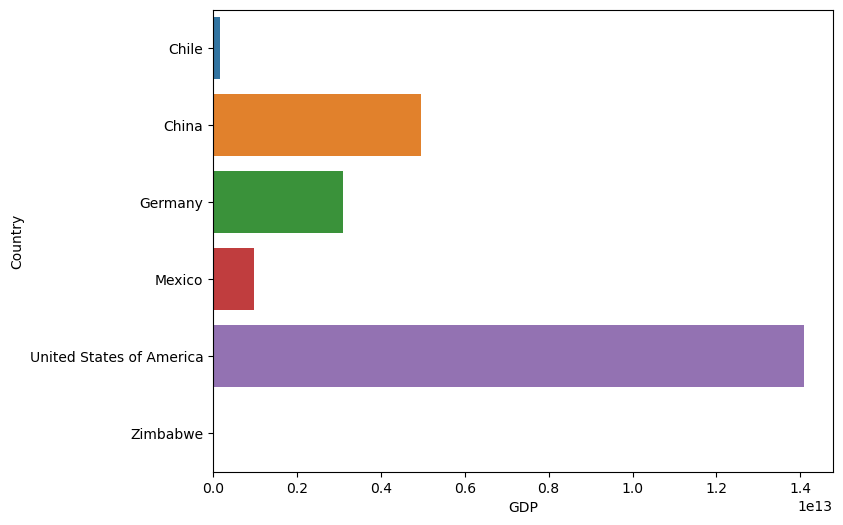

In [11]:
#Barplot of mean life expectancy by country
plt.figure(figsize=(8,6))
sns.barplot(x="GDP",y="Country",data=df_means)
plt.show()

C:\Users\parsh\AppData\Local\Temp\ipykernel_14548\1088203802.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country,palette="bright")
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\parsh\AppData\Local\Temp\ipykernel_14548\1088203802.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country,palette="bright")
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


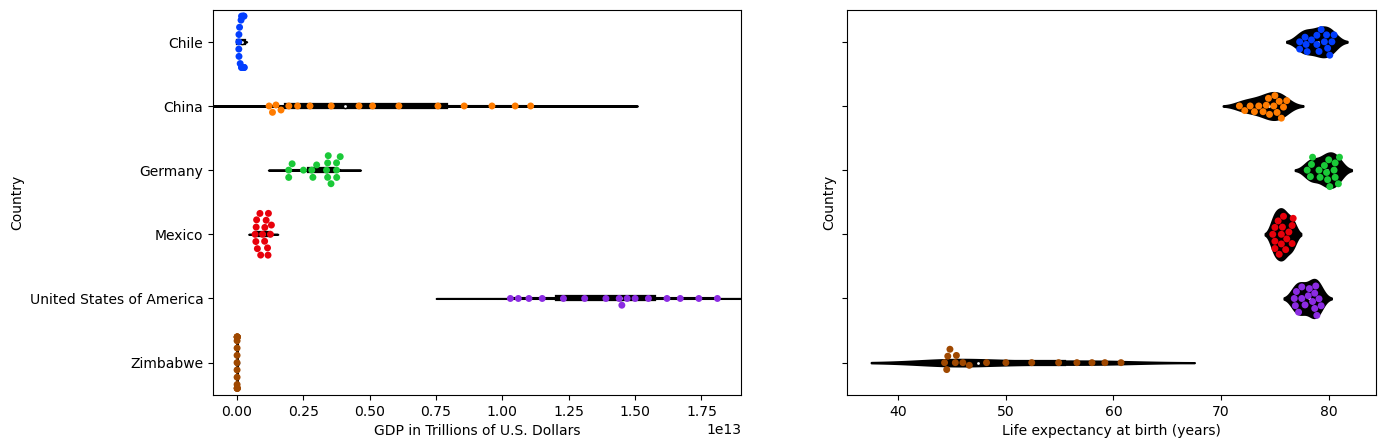

In [12]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country,palette="bright")
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country,palette="bright")
axes[1].set_xlabel("Life expectancy at birth (years)");

<Figure size 1000x1000 with 0 Axes>

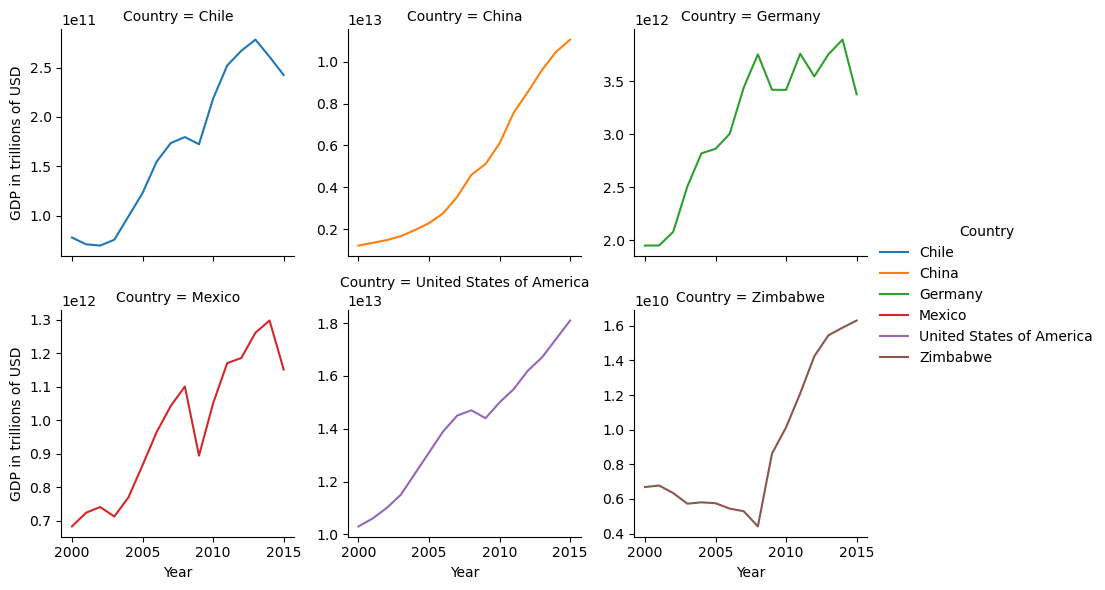

In [13]:
#Graphing GDP on a country level in the same figure
plt.figure(figsize=(10,10))
graphGDP=sns.FacetGrid(data=df,col="Country",sharey=False,col_wrap=3,hue="Country")
graphGDP=(graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in trillions of USD"))
plt.savefig("facet_GDP.png")
plt.show()

<Figure size 1000x1000 with 0 Axes>

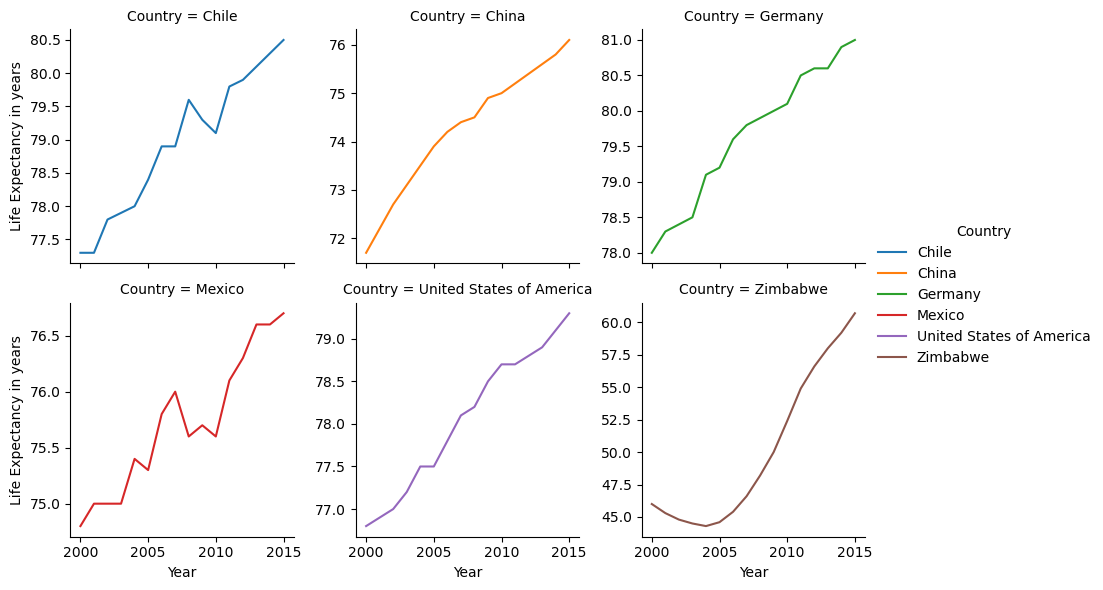

In [14]:
#Graphing LEABY on a country level
plt.figure(figsize=(10,10))
graphLEABY=sns.FacetGrid(data=df,col="Country",sharey=False,col_wrap=3,hue="Country")
graphLEABY=(graphLEABY.map(sns.lineplot,"Year","LEABY").add_legend().set_axis_labels("Year","Life Expectancy in years"))
plt.savefig("facet_LEABY.png")
plt.show()

<Figure size 1000x1000 with 0 Axes>

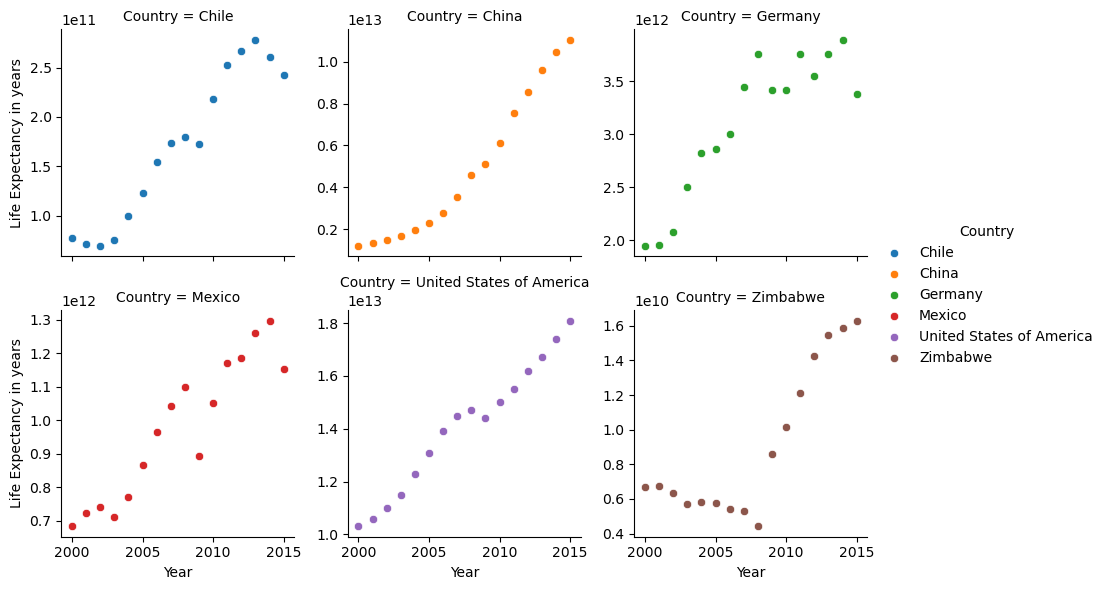

In [15]:
#Using facet grid to plot scatter plots on a country level
plt.figure(figsize=(10,10))
graphGDP=sns.FacetGrid(data=df, col="Country",sharey=False,col_wrap=3,hue="Country")
graphGDP=(graphGDP.map(sns.scatterplot,"Year","GDP").add_legend().set_axis_labels("Year","Life Expectancy in years"))
plt.savefig("facet_GDP.png")
plt.show()

**Conclusion**
This project was able to make different types of visualizations based on the type of data, despite the shape of the data being limited (96 rows and 4 columns).Apart from this, we can answer the following questions with the visualizations generated:
1. Has life expectancy increased over time for these 6 nations? Yes. Zimbabwe had the highest increase.
2. Has GDP increased with time for these 6 nations? Yes, especially for China.
3. Is there a connection between GDP and life expectancy of a country? Yes, there is a positive correlation between the 2.
4. What is the average life expectancy in these nations? It is between 70 to 80 years for all nations except Zimbabwe which is around 50 years.